## 1

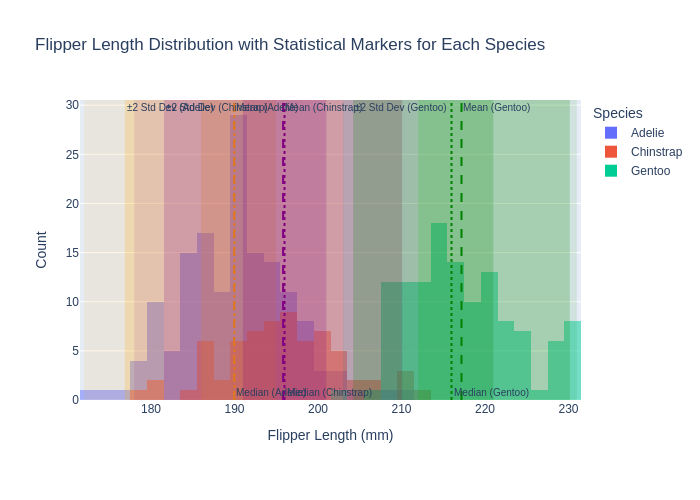

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define colors for each species
species_colors = {
    'Adelie': 'orange',
    'Chinstrap': 'purple',
    'Gentoo': 'green'
}

# Create histograms of flipper_length_mm for each species
fig = px.histogram(penguins, x='flipper_length_mm', color='species', barmode='overlay', nbins=30)

# Iterate over each species
for species in penguins['species'].unique():
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistical values
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    min_val = species_data.min()
    max_val = species_data.max()

    # Get species-specific color
    species_color = species_colors[species]
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color=species_color, dash='dash'), 
                  annotation_text=f'Mean ({species})', annotation_position="top right", 
                  annotation_font_size=10)
    
    fig.add_vline(x=median, line=dict(color=species_color, dash='dot'), 
                  annotation_text=f'Median ({species})', annotation_position="bottom right", 
                  annotation_font_size=10)
    
    # Add shaded rectangles for range, IQR, and ±2 standard deviations
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor=species_color, opacity=0.1, 
                  annotation_text='', annotation_position="top left", line_width=0)
    
    # Remove IQR annotation to avoid overlap, but keep the shaded region
    fig.add_vrect(x0=q1, x1=q3, fillcolor=species_color, opacity=0.2, 
                  annotation_text='', annotation_position="top left", line_width=0)
    
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor=species_color, opacity=0.2, 
                  annotation_text=f'±2 Std Dev ({species})', annotation_position="top left", 
                  annotation_font_size=10, line_width=0)

# Update layout for readability
fig.update_layout(
    title="Flipper Length Distribution with Statistical Markers for Each Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    legend_title="Species",
    margin=dict(t=100, r=50, b=100),
    showlegend=True
)

# Show plot
fig.show(renderer="png")


https://chatgpt.com/share/66f3549c-29e8-8013-b615-0403022f2b51

## 2

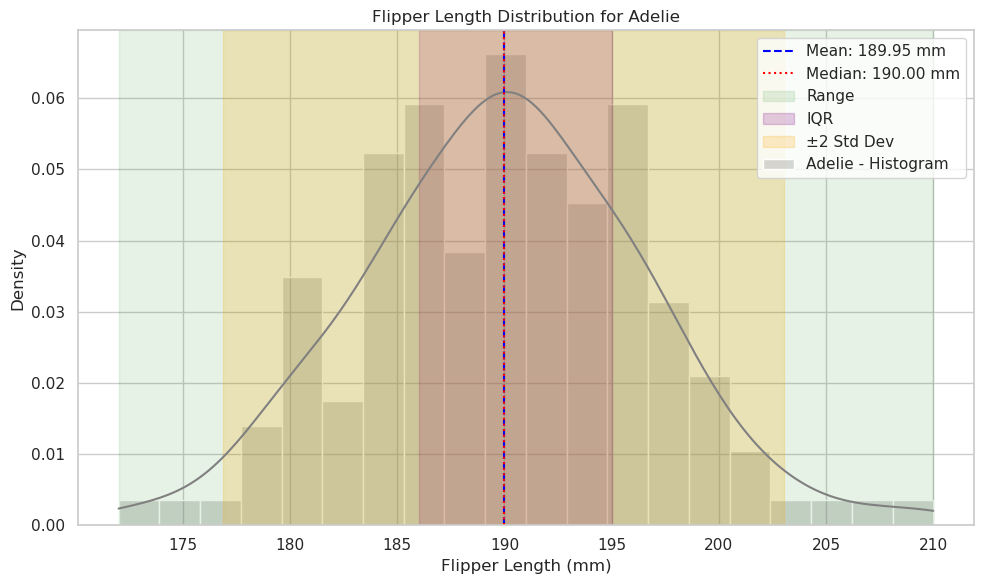

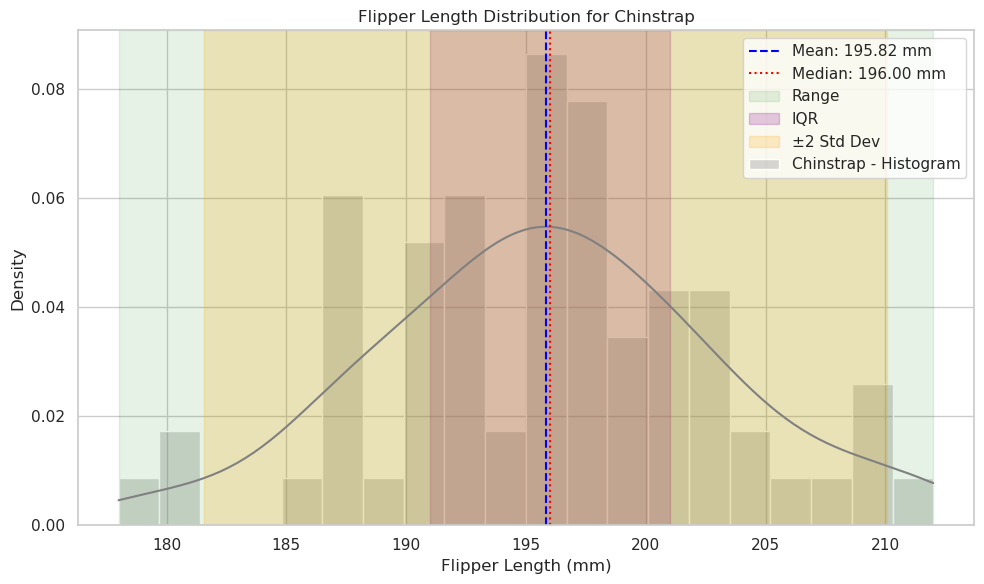

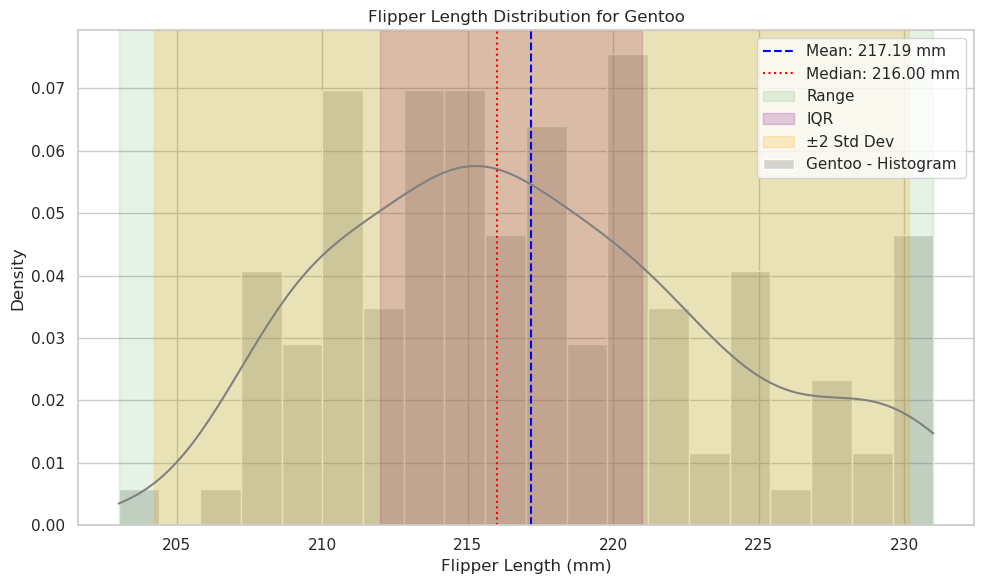

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set up the overall style of the plots
sns.set(style="whitegrid")

# Loop through each species and plot KDE, histogram, and statistical markers
species_list = penguins['species'].unique()
for species in species_list:
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Create a new figure for each species
    plt.figure(figsize=(10, 6))
    
    # Create the KDE plot and histogram
    sns.histplot(species_data, kde=True, label=f'{species} - Histogram', bins=20, stat="density", color='gray', alpha=0.3)
    
    # Calculate statistical values
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    min_val = species_data.min()
    max_val = species_data.max()
    
    # Add vertical lines for mean and median
    plt.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f} mm')
    plt.axvline(median, color='red', linestyle=':', label=f'Median: {median:.2f} mm')
    
    # Add shaded areas for range, IQR, and ±2 standard deviations
    plt.axvspan(min_val, max_val, color='green', alpha=0.1, label='Range')
    plt.axvspan(q1, q3, color='purple', alpha=0.2, label='IQR')
    plt.axvspan(mean - 2*std, mean + 2*std, color='orange', alpha=0.2, label='±2 Std Dev')

    # Add labels and title
    plt.title(f"Flipper Length Distribution for {species}")
    plt.xlabel("Flipper Length (mm)")
    plt.ylabel("Density")

    # Show the legend
    plt.legend(loc='upper right')

    # Display the plot
    plt.tight_layout()
    plt.savefig("q2.png")


https://chatgpt.com/share/66f3549c-29e8-8013-b615-0403022f2b51

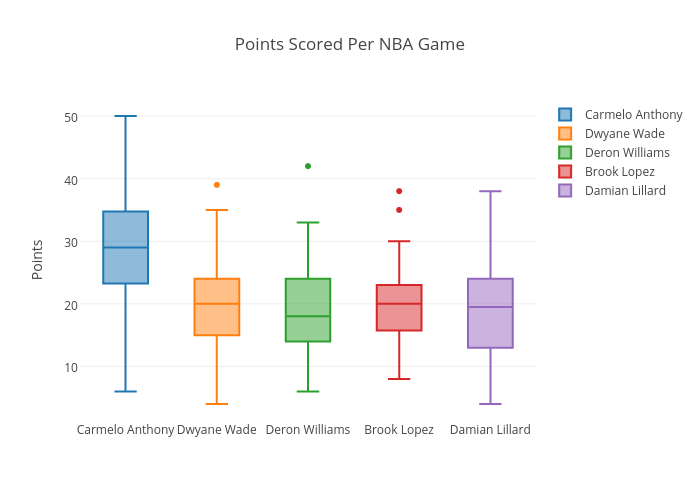

In [3]:
from IPython.display import Image
Image("https://plotly.com/~plotly2_demo/108/carmelo-anthony-dwyane-wade-deron-williams-brook-lopez-damian-lillard.png")

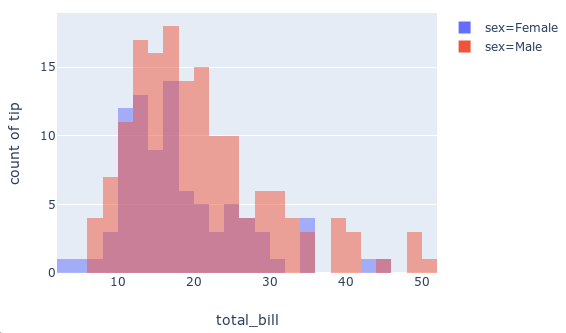

In [4]:
Image("https://user-images.githubusercontent.com/4560057/68098864-7feda480-febf-11e9-8cc5-d4df87692f38.png")

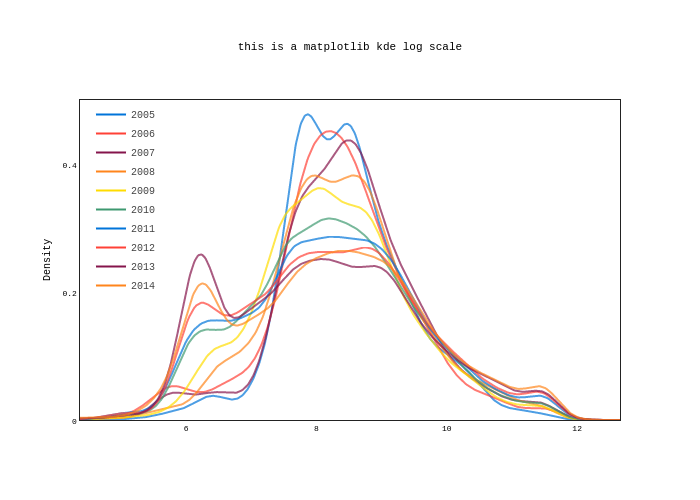

In [5]:
Image("https://plotly.com/~aullrich/2646/this-is-a-matplotlib-kde-log-scale.png")

## 3

https://chatgpt.com/share/66f3665e-1f58-8013-ab37-6f25eb62e666

Box plots, histograms, and KDE graphs are all useful in their own ways, and there should almost always be a case where one of them is more optimal than the other. However, if I were to pick one, I would chose KDE graphs, as they can show different types of data distributions (e.g. bimodal, trimodal, multimodal), unlike box plots, while also showing it in a smooth way so it can be used to estimate results for larger samples or even a population (unlike a histogram). The smooth curve also gives it more flexibility in estimating the number of values that would fall within a given range for a certain number of total values. Although the minimum and maximum values cannot be accurately obtained from KDEs, KDEs still roughly preserve the expected median and mode of the data, as well as quartiles, and the mean can also be calculated using the area under the KDE curve. The bandwidth must be set to a good value for this to be true, but the same goes for the number of bins for histograms, and box plots simply do not convey as much information. Therefore, I prefer KDEs the most, as when used correctly, KDEs can preserve most important qualities of the data while representing it in a way that is pleasing to the eye. 

## 4

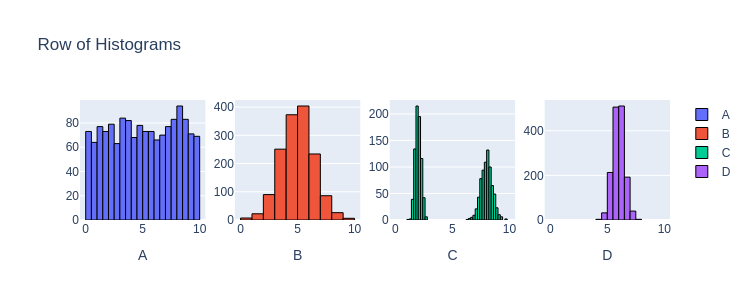

In [9]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. A and C have similar means (around 5) and variance. Visually, most data points in C seem to be around 3 away from the mean, while points in A seem to be evenly spread from 0 to 10. However, the points at the extremes (0 and 10) should compensate from the points near 5, so the variance should be similar for A and C.
2. B has a similar mean to A and C (also around 5) but its variance is lower (visually, the majority of the data points are within 1 or 2 of the mean).
3. (and 4) No two datasets have quite similar variances and quite different means. A, B, and C have roughly the same mean (around 5), while D has a mean at around 6. D has the lowest variance out of all 4 histograms, with almost all of its data points being at most 1 away from the mean.

## 5

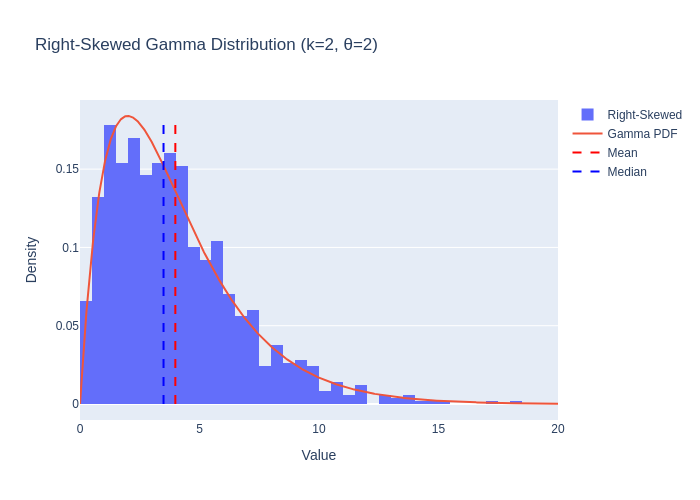

In [24]:
import numpy as np
import plotly.graph_objects as go
from scipy import stats

# Parameters for right-skewed gamma distribution
k_right = 2
theta_right = 2

# Generate data
data_right = np.random.gamma(k_right, theta_right, 1000)

# Calculate mean and median
mean_right = np.mean(data_right)
median_right = np.median(data_right)

# Create a histogram with Plotly
fig_right = go.Figure()

# Add histogram
fig_right.add_trace(go.Histogram(x=data_right, histnorm='probability density', name='Right-Skewed'))

# Add gamma PDF
x_right = np.linspace(0, 20, 1000)
y_right = stats.gamma.pdf(x_right, k_right, scale=theta_right)
fig_right.add_trace(go.Scatter(x=x_right, y=y_right, mode='lines', name='Gamma PDF'))

# Add mean line
fig_right.add_trace(go.Scatter(x=[mean_right, mean_right], y=[0, max(y_right)], mode='lines', name='Mean', line=dict(color='red', dash='dash')))

# Add median line
fig_right.add_trace(go.Scatter(x=[median_right, median_right], y=[0, max(y_right)], mode='lines', name='Median', line=dict(color='blue', dash='dash')))

# Update layout
fig_right.update_layout(
    title='Right-Skewed Gamma Distribution (k=2, θ=2)',
    xaxis_title='Value',
    yaxis_title='Density',
    barmode='overlay'
)

# Show plot as PNG
fig_right.show(renderer="png")


When a distribution is right skewed, there is a tail on the right side. This pulls the mean towards the right, past the median (so mean > median). This is because larger values have a larger impact than small values on the mean, while the median is simply the point where 50% of the values are larger and 50% are smaller, so the existance of large value does not have a strong impact on the median. Conversely, when a distribution is left skewed, there is a tail on the left side, which pulls the mean towards the left, making it smaller than the median for the same reason as to why it is larger when it is right skewed (the median is not impacted much by the existance of many small or large values, while the mean is).


As seen in the graph above, the tail on the right pulls the mean above the median.

## 6

In [27]:
import pandas as pd

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/andreamoleri/Hauntings/main/hauntings.csv")

# Display basic statistics
statistics = data.describe(include='all')
print(statistics)

               city        country                       description  \
count         10989          10992                             10992   
unique         4385              1                             10987   
top     Los Angeles  United States  October 2007 - Has been removed.   
freq             61          10992                                 2   
mean            NaN            NaN                               NaN   
std             NaN            NaN                               NaN   
min             NaN            NaN                               NaN   
25%             NaN            NaN                               NaN   
50%             NaN            NaN                               NaN   
75%             NaN            NaN                               NaN   
max             NaN            NaN                               NaN   

                     location       state state_abbrev    longitude  \
count                   10989       10992        10992  9731.000

^ can find which city and state had the highest number of hauntings (LA with 61 and California with 1070), as well as the total number of hauntings 

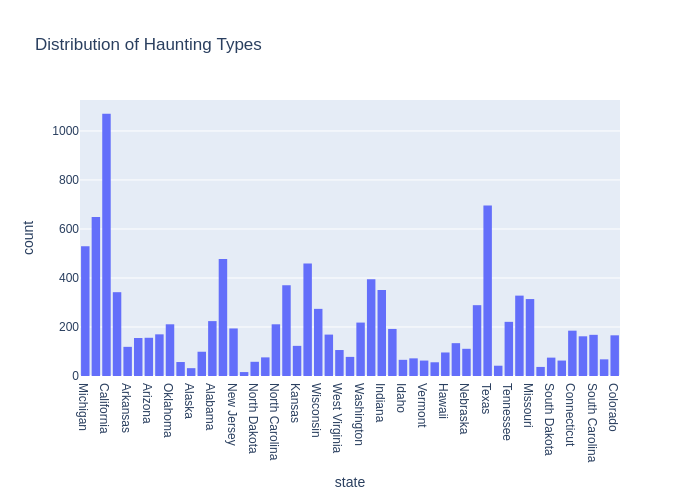

In [47]:
import plotly.express as px

# Count plot of haunting types
fig = px.histogram(data, x='state', title='Distribution of Haunting Types')
fig.show(renderer="png")

^ histogram provides a more visual way to compare the number of hauntings in each state

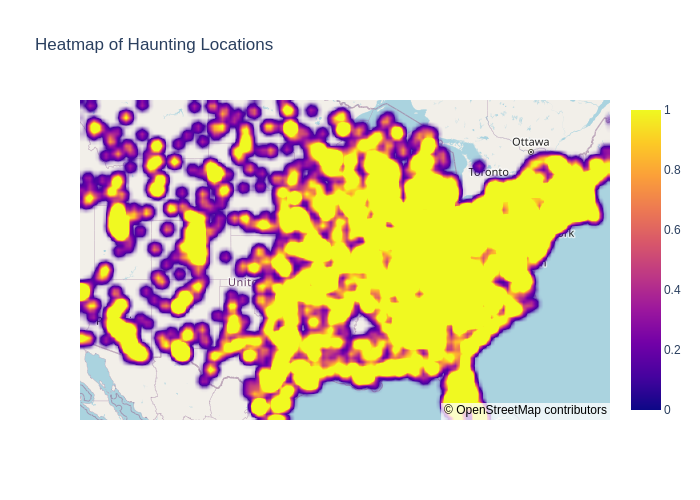

In [51]:
import pandas as pd
import plotly.express as px

data = pd.read_csv("https://raw.githubusercontent.com/andreamoleri/Hauntings/main/hauntings.csv")

# Try plotting with a different map style
fig = px.density_mapbox(data, lat='latitude', lon='longitude', radius=10,
                        mapbox_style="open-street-map",
                        title='Heatmap of Haunting Locations', zoom=3)
fig.show(renderer="png")

# Used an additional conversation: https://chatgpt.com/share/66f38556-4138-8013-9bf9-efa4112f8546

^ map showing where each hauting occured in the world

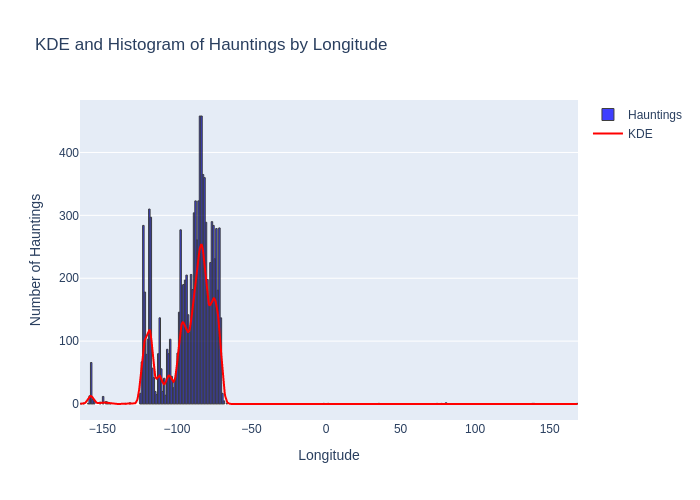

In [72]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/andreamoleri/Hauntings/main/hauntings.csv")

# Group by longitude and count the number of hauntings
longitude_counts = data['longitude'].value_counts().reset_index()
longitude_counts.columns = ['longitude', 'number_of_hauntings']

# Prepare the data for KDE
x = longitude_counts['longitude'].values
weights = longitude_counts['number_of_hauntings'].values

# Create a KDE using scipy with adjusted bandwidth
kde = gaussian_kde(x, weights=weights)
kde.set_bandwidth(bw_method=kde.factor * 0.6)  # Adjusting the bandwidth

# Create a range for x values
x_range = np.linspace(x.min(), x.max(), 1000)
kde_values = kde(x_range) * np.sum(weights) * (x_range[1] - x_range[0]) * 2  # Normalize the KDE and incrase height

# Create a histogram
fig = go.Figure()

# Add histogram
fig.add_trace(go.Histogram(
    x=x,
    y=weights,
    histfunc='sum',
    name='Hauntings',
    opacity=0.75,
    marker=dict(color='blue', line=dict(color='black', width=1)),
))

# Add KDE line
fig.add_trace(go.Scatter(
    x=x_range,
    y=kde_values,
    mode='lines',
    name='KDE',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='KDE and Histogram of Hauntings by Longitude',
    xaxis_title='Longitude',
    yaxis_title='Number of Hauntings',
    barmode='overlay',
)

# Show the figure
fig.show(renderer="png")

# Used this conversation: https://chatgpt.com/share/66f38771-b9f0-8013-91de-36c073880ba3

^ show number of hauntings by longitude using histogram and kde (we can observe that the data is somewhat bimodal, with a small group around -120 and a larger group around -80

https://chatgpt.com/share/66f383a5-ee14-8013-a9a1-7e1a4dc6ba90
https://chatgpt.com/share/66f38771-b9f0-8013-91de-36c073880ba3
https://chatgpt.com/share/66f38556-4138-8013-9bf9-efa4112f8546

## 7

In [81]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="continent",
           size="pop", color="continent", hover_name="country",
           log_x=False, size_max=300, range_x=[100,75000], range_y=[25,90])

## 8

In [93]:
import plotly.express as px
import pandas as pd

# Load the dataset (replace this with your actual dataset)
df = px.data.gapminder()

# Calculate 'percent change' for 'gdpPercap', grouped by 'country'
df['percent change'] = df.groupby('country')['gdpPercap'].pct_change()

# Replace NaN values (first entries) with 0 to start at 0
df['percent change'] = df['percent change'].fillna(0)

# Create a 'rank' column based on the 'gdpPercap' values for each year
df['rank'] = df.groupby('year')['gdpPercap'].rank(method='min')

# Now create the scatter plot
px.scatter(df, x="percent change", y="rank", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           size_max=50, range_x=[-2, 2])


https://chatgpt.com/share/66f38bfb-0c08-8013-81a9-57c36fd6ad5d

## 9

Somewhat